# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4: Линейные модели, введение в конкурсную задачу


###### <hr\>
**Общая информация**

**Срок сдачи:** 17 апреля 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 17 апреля, -4 балла после 06:00 24 апреля, -6 баллов после 06:00 1 мая

Имеется ввиду именно сдача данного ДЗ, а не конечного результата по конкурсу (см ниже).<br\>
Жесткий дедлайн по конкурсной задаче - 14 мая 23:59 GMT.

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Определям, что вам досталось

<center><img src='https://static1.squarespace.com/static/571a6e39b6aa608067028725/t/577988518419c2d62fb5922f/1467582555915/'></center>

Укажите свою фамилию на русском языке в поле ниже.

In [3]:
USER_NAME = u"Зайцев".lower()
REGULARIZATIONS = ["L1", "L2"]
ALGORITHM = ["", "Mini Batch"]

print "Имплементируйте обучение логистической регрессии с %s регуляризацией с помощью метода %s Stochastic Gradient Descent (SGD)"\
% (
    REGULARIZATIONS[hash(USER_NAME) % 2],
    ALGORITHM[hash(USER_NAME[::-1]) % 2]
)

Имплементируйте обучение логистической регрессии с L2 регуляризацией с помощью метода Mini Batch Stochastic Gradient Descent (SGD)


#### Замечания
* В SGD градиент расчитывается по одному случайному объекту
* В Mini Batch SGD - по подвыборке объектов т.е в алгоритме надо
    * Перемешать выборку
    * Разбить на части (примерно) одинакового размера - мини батчи
    * Считать градиент по мини батчам
* Сделайте убывающую скорость спуска, например `alpha/n_epoch` или `alpha/n_iter` или `alpha/n_batch` или ...
* Для отладки работы алгоритма, реализуйте возможность сохранения или вывода ошибки модели после очередной итерации/батча/эпохи.
* Правило останова - максимальное количество эпох
    
Эпохой в SGD и MB-SGD называется один проход по **всем** объектам в выборке (тем или иным способом)

# Реализация модели

## Имплементация (6 баллов)

In [156]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    """
    Предполагается, что в выборке всегда 2 класса
    """
    
    def __init__(self, C=500, alpha=0.01, max_epoch=10, epsilon=0.0000000001):
        """
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.loss = np.zeros(max_epoch)
        self.epsilon=epsilon
    
    def fit(self, X, y=None):
        '''
        Обучение модели
        y должен принимать значения 1 и -1
        '''
        n = y.shape[0]
        X=np.c_[np.ones(X.shape[0]), X]
        w = np.random.rand(X.shape[1])
        indexes = np.arange(X.shape[0], dtype=int)
        i=0
        split_num = n//100
        
        while(i<self.max_epoch):
            np.random.shuffle(indexes)
            batches = np.array_split(indexes, split_num)
            
            for batch in batches:
                grad = 0
                summ = np.zeros(X.shape[1])
            
                for ind in batch:
                    summ+=y[ind]*X[ind]/(np.exp(y[ind]*w.T.dot(X[ind]))+1)
                grad = (-1/float(n))*summ + w*2/self.C
                w = w - self.alpha*grad
                
            #Подсчитываем функцию потерь
            
            for j in xrange(X.shape[0]):
                self.loss[i]+=-np.log(1/(1+np.exp(-y[j]*w.T.dot(X[j]))))
            self.loss[i]=self.loss[i]/float(n)+w.T.dot(w)/self.C
            
            if(i>10 and (abs(self.loss[i-1]-self.loss[i]) < self.epsilon)):
                break
            i+=1
        self.w=w
        return self
    
    def partial_fit(self, X, y=None):
        '''
        По желанию - метод дообучения модели на новых данных
        '''
    
        return self
        
    def predict(self, X):
        '''
        Возвращение метки класса
        '''
        y_hat = np.zeros(X.shape[0])
        X=np.c_[np.ones(X.shape[0]), X]
        
        for i in xrange(X.shape[0]):
            if(self.w.T.dot(X[i])>0):
                y_hat[i]=1
            else:
                y_hat[i]=-1
        
        return y_hat
    
    def predict_proba(self, X):
        '''
        Возвращение вероятности каждого из классов
        '''
        y_hat_proba = np.zeros(X.shape[0])
        X=np.c_[np.ones(X.shape[0]), X]
        for i in xrange(X.shape[0]):
            y_hat_proba[i] = 1/(1+np.exp(self.w.T.dot(X[i])))
                                
        return y_hat_proba

## Проверка на синтетических данных (2 балл)

Запустите ваш алгоритм на синтетических данных. 
Выведите полученные веса и нарисуйте разделяющую границу между классами.

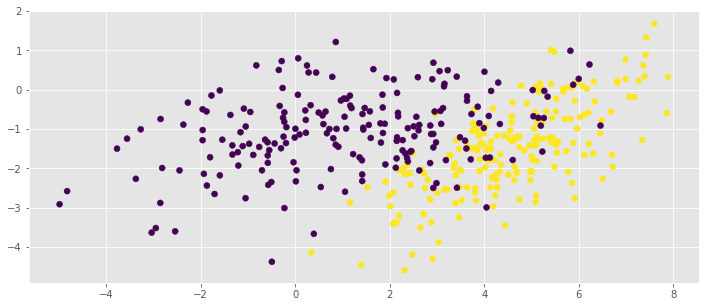

In [103]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), -np.ones(200)]

plt.scatter(X[:,0], X[:,1], c=y)

In [104]:
model = MySGDClassifier(max_epoch=5000, alpha=0.1)
model.fit(X, y)

MySGDClassifier(C=500, alpha=0.1, max_epoch=5000)

In [105]:
model.w

array([-1.63312867,  0.52729239, -0.32229996])

In [106]:
## Your Code Here
y_hat = model.predict_proba(X)

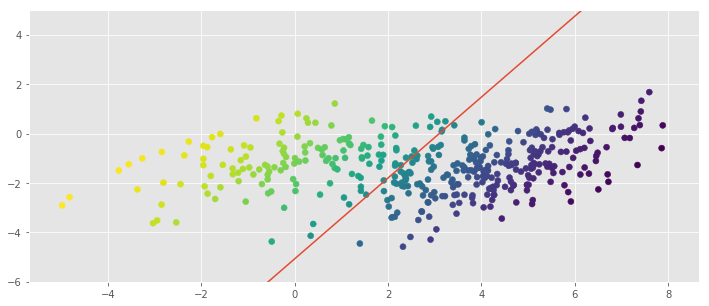

In [108]:
x1 = np.linspace(-4, 8, 50)
x2 = (-model.w[0]-model.w[1]*x1)/model.w[2]
plt.plot(x1, x2)
plt.ylim(-6, 5)
plt.scatter(X[:,0], X[:,1], c=y_hat)

## Анализ сходимости (2 балл)

Покажите сходимость вашего метода: изобразите графики зависимости значения функции потерь (по всей выборке) после очередной итерации/батча/эпохи (выбрать одно) для разных `alpha`.

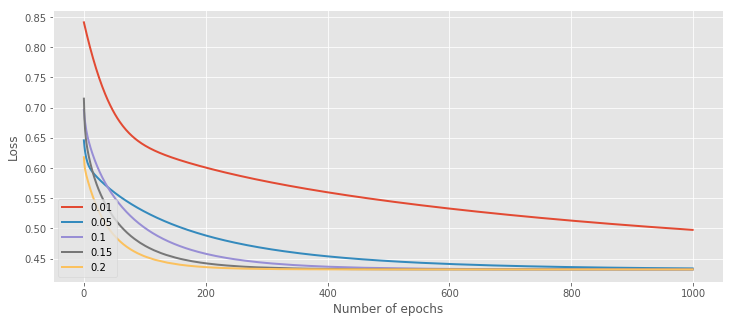

In [84]:
## Your Code Here

alphas = [0.01, 0.05, 0.1, 0.15, 0.2]
epochs = np.arange(1000)
for alpha in alphas:
    ln_model = MySGDClassifier(max_epoch=1000, alpha=alpha)
    ln_model.fit(X, y)
    plt.plot(epochs, ln_model.loss, lw=2, label=alpha)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend(loc="lower left")
plt.show()


# Введение в конкурсную задачу

## О hearthstone

[Hearthstone](http://eu.battle.net/hearthstone/ru/) - карточная он-лайн игра по мотивам вселенной Warcraft.

Каждый игрок играет за персонажа определенного класса и собирает колоду карт которую может разыгрывать во время игры. Для дальнейших деталей обратитесь к [wiki](https://ru.wikipedia.org/wiki/Hearthstone), посмотрите youtube или поиграйте сами (но не долго =) ).

Теми или иными способами игрок может отнимать жизни у своего оппонента, таким образом цель раунда - побить другого игрока.

<center><img src='http://ps3hits.ru/wp-content/uploads/2015/08/hearthstone-game-sshot-1.jpg'></center>

## Постановка задачи

В рамках конференции [AAIA 17](https://fedcsis.org/2017/aaia) было запущено [соревнование](https://knowledgepit.fedcsis.org/contest/view.php?id=120) по предсказанию исхода раунда в heartstone. 

Используя признаки, которые описывают текущее состояние раунда необходимо предсказать **вероятность** победы игрока в этом раунде.

Качество модели измеряется с помощью **ROC-AUC**

### Правила
* Объединяться в команды по правилам конкурса можно, но по правилам нашего курса - нельзя)
* Вы можете использовать любой алгоритм, даже неизученный в нашем курсе (если на защите сможете объяснить как он работает)
* Имейте ввиду, что вы должны отправить результаты строго до 14 мая 23:59 GMT на сайт соревнования (раздел submission). Без результата в leaderboard оценка выставлена не будет.

## Данные

Для того, чтобы получить данные необходимо зарегистрироваться на сайте соревнования. 

Данные содержат набор информации о раунде в некоторый момент времени: жизни игрока и оппонента, номер хода, карты на столе, карты в руке игрока, количество карт в руке оппонента и тп.<br/>
По игроку №1 (далее просто **игрок**) помимо всего прочего известен набор карт "в руке".</br>
По игроку №2 (далее просто **оппонент**) эта информация отсутствует.</br>


Данные поставляются в двух форматах:
* В формате json содержится полная информация по текущему состоянию раунда
* В табличном формате упрощенная аггрерированная информация по текущему состоянию раунда

В данных для обучению содержится 2 млн. игр, разбитых на 4 файла. Названия признаков говорят сами за себя.
Целевой признак - `decision` (1 - победил игрок, 0 - победил оппонент).

## Работа с простыми табличными данными (1 балл)

По соображениям сокращения времени вычислений, проделаем основные шаги по одной части данных.

Если данные не будут помещаться вам с оперативную память, рекомендуется совершить предобработку в python, а  моделирование выполнять с помощью [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit).

In [123]:
# Загрузка данных целиком
# df_list = []
# for chunk in range(1,5):
#     filepath = './trainingData_tabular_chunk%d.csv' % chunk
#     df_list.append(pd.read_csv(filepath, sep=','))

# df_data = pd.concat(df_list)

# Загрузка одной части данных
filepath = './trainingData_tabular_chunk1.csv'
df_data = pd.read_csv(filepath, sep=',')

In [124]:
df_data.shape

(500000, 45)

In [125]:
# для удобства
df_data.columns = df_data.columns.str.replace('.', '_')
df_data = df_data.set_index('gamestate_id')

In [112]:
df_data.head().T

gamestate_id,4687346,3270826,3189487,4098946,2661127
decision,1,1,1,1,0
turn,14,7,5,8,13
opponent_armor,0,0,3,0,0
opponent_attack,0,0,0,0,0
opponent_hero_card_id,798,754,612,390,25
opponent_hp,5,22,29,26,30
opponent_special_skill_used,0,0,0,0,0
opponent_weapon_durability,0,0,0,0,0
opponent_crystals_all,10,6,4,7,10
opponent_crystals_current,10,6,1,7,1


In [126]:
# Распределение классов
df_data.decision.mean()

# Примерно поровну

0.50470199999999998

#### Задание

* Определите количество уникальных карт героя у игрока и оппонента.
* Преобразуйте категориальные переменные с помощьб one-hot кодирования, добавьте к датасету и удалите прежние столбцы

In [127]:
## Youd Code Here
for i in df_data['player_hero_card_id'].unique():
    df_data['player_hero_'+str(i)]=(df_data['player_hero_card_id']==i).astype(float)

In [128]:
for i in df_data['opponent_hero_card_id'].unique():
    df_data['opponent_hero_'+str(i)]=(df_data['opponent_hero_card_id']==i).astype(float)

In [129]:
df_data.head().T

gamestate_id,4687346,3270826,3189487,4098946,2661127
decision,1.0,1.0,1.0,1.0,0.0
turn,14.0,7.0,5.0,8.0,13.0
opponent_armor,0.0,0.0,3.0,0.0,0.0
opponent_attack,0.0,0.0,0.0,0.0,0.0
opponent_hero_card_id,798.0,754.0,612.0,390.0,25.0
opponent_hp,5.0,22.0,29.0,26.0,30.0
opponent_special_skill_used,0.0,0.0,0.0,0.0,0.0
opponent_weapon_durability,0.0,0.0,0.0,0.0,0.0
opponent_crystals_all,10.0,6.0,4.0,7.0,10.0
opponent_crystals_current,10.0,6.0,1.0,7.0,1.0


## Обучение модели (1 балл)

#### Задание

* Получите матрицу объект признак `X` и вектор целевого признака `y`
* Обучите модуль из первой части этого ДЗ на данных

In [133]:
## Youd Code Here
y_train=df_data.loc[:, 'decision'].values
y_train

array([1, 1, 1, ..., 1, 0, 0])

In [155]:
X_train = df_data.drop('decision', axis=1).drop('opponent_hero_25', axis=1).drop('player_hero_326', axis=1).values
X_train

array([[ 14.,   0.,   0., ...,   0.,   0.,   0.],
       [  7.,   0.,   0., ...,   0.,   0.,   0.],
       [  5.,   3.,   0., ...,   0.,   0.,   0.],
       ..., 
       [ 23.,   0.,   0., ...,   0.,   0.,   0.],
       [  6.,   0.,   0., ...,   0.,   0.,   0.],
       [  8.,   0.,   1., ...,   0.,   0.,   0.]])

In [ ]:
lin_model=MySGDClassifier(max_epoch=500, alpha=0.2)
lin_model.fit(X_train, y_train)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:42: RuntimeWarning: overflow encountered in exp


## Применение модели (3 балла)
#### Задание
* Загрузите тестовые данные
* Выполните те же операции с датасетом, что и с обучающей выборкой
* Примените модель и загрузите решение на страницу конкурса
* Напечатайте ваш ник и оценку качества, полученную после загрузки

Судя по описанию, submission file должен состоять из одного столбца с числами, соответствующим вероятностям победы игрока.

In [139]:
## Youd Code Here
filepath = './testData_tabular.csv'
df_test = pd.read_csv(filepath, sep=',')
df_test.columns = df_test.columns.str.replace('.', '_')
df_test = df_test.set_index('gamestate_id')
for i in df_test['player_hero_card_id'].unique():
    df_test['player_hero_'+str(i)]=(df_test['player_hero_card_id']==i).astype(float)
for i in df_test['opponent_hero_card_id'].unique():
    df_test['opponent_hero_'+str(i)]=(df_test['opponent_hero_card_id']==i).astype(float)

In [140]:
X_test = df_test.drop('decision', axis=1).values

In [143]:
y_test = lin_model.predict_proba(X_test)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:83: RuntimeWarning: overflow encountered in exp


In [146]:
y_test

array([  4.71947194e-224,   1.94645371e-174,   2.81501733e-204, ...,
         9.04373025e-108,   9.25883298e-202,   2.32286910e-137])

In [152]:
with open("Output.txt", "w") as text_file:
     for i in xrange(len(y_test)):
        text_file.write(str(y_test[i])+'\n')